# Student grades prediction


Name : Soham Vashi                                                                                                          
Batch : DS2402

# Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

# Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams                                                                 

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.                                                                                                                        
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [5]:
df.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.shape

(571, 43)

Data set contains 571 rows and 43 coulmns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Target variable are of float64 type remaining are object datatype.

# Checking for null values

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<Axes: >

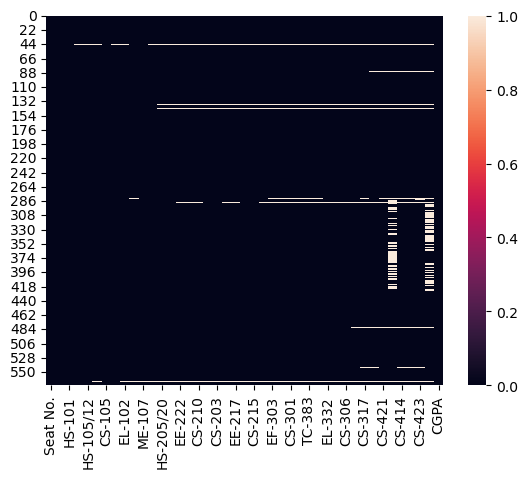

In [10]:
sns.heatmap(df.isnull())

There are null values are present in the dataset.

# Handling null values

In [3]:
#checking for percentage of null values present in data set
df.isnull().mean()*100

Seat No.      0.000000
PH-121        0.000000
HS-101        0.000000
CY-105        0.175131
HS-105/12     0.175131
MT-111        0.350263
CS-105        0.000000
CS-106        0.350263
EL-102        0.350263
EE-119        0.350263
ME-107        0.350263
CS-107        0.350263
HS-205/20     0.875657
MT-222        0.875657
EE-222        1.225919
MT-224        1.225919
CS-210        1.225919
CS-211        0.875657
CS-203        0.875657
CS-214        1.050788
EE-217        1.050788
CS-212        1.050788
CS-215        1.050788
MT-331        1.576182
EF-303        1.751313
HS-304        1.751313
CS-301        1.751313
CS-302        1.751313
TC-383        1.751313
MT-442        1.751313
EL-332        1.576182
CS-318        1.576182
CS-306        1.576182
CS-312        1.751313
CS-317        2.101576
CS-403        2.101576
CS-421        2.101576
CS-406       14.886165
CS-414        2.276708
CS-419        2.276708
CS-423        2.451839
CS-412       13.835377
CGPA          0.000000
dtype: floa

To handle missing values we will use simple imputer method

In [3]:
from sklearn.impute import SimpleImputer
simple_impute= SimpleImputer(strategy = 'most_frequent')  
from sklearn.compose import make_column_transformer

In [4]:
col_transform =  make_column_transformer((simple_impute,['CY-105', 'HS-105/12', 'MT-111','CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']),remainder='passthrough')

In [5]:
dfnew= pd.DataFrame(col_transform.fit_transform(df),columns=['CY-105', 'HS-105/12', 'MT-111',
        'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412','Seat No.', 'PH-121', 'HS-101','CS-105', 'CGPA'])
dfnew

CY-105 HS-105/12 MT-111 CS-106 EL-102 EE-119 ME-107 CS-107 HS-205/20  \
0       C-         C     C-      D     C-     B-     C-     C-        B+   
1       D+         D     B-      D      A     D+      D     B+        C+   
2        A        B-     B+     B-     B+     A-     A-     B-        A-   
3       D+         D      D     D+     C-      D     C+      D         B   
4       A-        B+      A     A-     B+      A     A-      C         A   
..     ...       ...    ...    ...    ...    ...    ...    ...       ...   
566      A        A-     A+     A-     A-     A+     B+     A+         A   
567      A         A      A      A     A-      A      A     A+        B+   
568     A-        B+      A      A      A      A      B     A+        B-   
569      D         A      D     B-     C-     B-     C-     A+        C+   
570      D         C      C      B     C+      C     D+     B-        C+   

    MT-222  ... CS-406 CS-414 CS-419 CS-423 CS-412  Seat No. PH-121 HS-101  \
0        D  ...     A-      A     C-      B     A-  CS-97001     B-     D+   
1       B-  ...     A-     B-      C      C      B  CS-97002      A      D   
2        A  ...      A      A      A     A-      A  CS-97003      A      B   
3       D+  ...     B-      B     C+     C+     C+  CS-97004      D     C+   
4        A  ...     A-      A     A-     A-      A  CS-97005     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...       ...    ...    ...   
566     A+  ...      A     B+     B+      B      A  CS-97567      B      A   
567     C+  ...     A-      B     A-      C     A-  CS-97568     A+      A   
568      B  ...      A      C     B+     A-     A-  CS-97569      B      A   
569      D  ...      D      C      B     B-      C  CS-97570      A     B+   
570     C-  ...      F     C-     B+      D     C-  CS-97571      C      D   

    CS-105   CGPA  
0       D+  2.205  
1        C  2.008  
2        A  3.608  
3       A-  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567      A  3.772  
568      A   3.47  
569     D+  2.193  
570     D+  1.753  

[571 rows x 43 columns]

In [6]:
#checking for null values
dfnew.isnull().sum()

CY-105       0
HS-105/12    0
MT-111       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
Seat No.     0
PH-121       0
HS-101       0
CS-105       0
CGPA         0
dtype: int64

In [10]:
#checking for duplicate vale
dfnew.duplicated().sum()

0

In [14]:
#checking for unique value
dfnew.nunique()

CY-105        13
HS-105/12     13
MT-111        13
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
Seat No.     571
PH-121        13
HS-101        12
CS-105        11
CGPA         491
dtype: int64

# Statistical summary

In [15]:
dfnew.describe()

CY-105 HS-105/12 MT-111 CS-106 EL-102 EE-119 ME-107 CS-107 HS-205/20  \
count     571       571    571    571    571    571    571    571       571   
unique     13        13     13     13     13     12     13     14        13   
top         A         A     A-     A-     A-     A-     A-      A        A-   
freq      178        97    107    118    107    139     81    107       155   

       MT-222  ... CS-406 CS-414 CS-419 CS-423 CS-412  Seat No. PH-121 HS-101  \
count     571  ...    571    571    571    571    571       571    571    571   
unique     14  ...     14     13     12     12     13       571     13     12   
top        A-  ...     A-      A     A-     A-     A-  CS-97001     A-     A-   
freq       91  ...    262    189    133    136    236         1    112     82   

       CS-105     CGPA  
count     571  571.000  
unique     11  491.000  
top         A    3.019  
freq      151    5.000  

[4 rows x 43 columns]

# Exploratory data analysis(EDA) and Visualisation

In [7]:
#droping column seat number 
dfnew= dfnew.drop(['Seat No.'],axis=1)
dfnew

CY-105 HS-105/12 MT-111 CS-106 EL-102 EE-119 ME-107 CS-107 HS-205/20  \
0       C-         C     C-      D     C-     B-     C-     C-        B+   
1       D+         D     B-      D      A     D+      D     B+        C+   
2        A        B-     B+     B-     B+     A-     A-     B-        A-   
3       D+         D      D     D+     C-      D     C+      D         B   
4       A-        B+      A     A-     B+      A     A-      C         A   
..     ...       ...    ...    ...    ...    ...    ...    ...       ...   
566      A        A-     A+     A-     A-     A+     B+     A+         A   
567      A         A      A      A     A-      A      A     A+        B+   
568     A-        B+      A      A      A      A      B     A+        B-   
569      D         A      D     B-     C-     B-     C-     A+        C+   
570      D         C      C      B     C+      C     D+     B-        C+   

    MT-222  ... CS-421 CS-406 CS-414 CS-419 CS-423 CS-412 PH-121 HS-101  \
0        D  ...     C-     A-      A     C-      B     A-     B-     D+   
1       B-  ...      D     A-     B-      C      C      B      A      D   
2        A  ...      C      A      A      A     A-      A      A      B   
3       D+  ...     C-     B-      B     C+     C+     C+      D     C+   
4        A  ...     B-     A-      A     A-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...      A      A     B+     B+      B      A      B      A   
567     C+  ...      A     A-      B     A-      C     A-     A+      A   
568      B  ...     B+      A      C     B+     A-     A-      B      A   
569      D  ...     C-      D      C      B     B-      C      A     B+   
570     C-  ...      D      F     C-     B+      D     C-      C      D   

    CS-105   CGPA  
0       D+  2.205  
1        C  2.008  
2        A  3.608  
3       A-  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567      A  3.772  
568      A   3.47  
569     D+  2.193  
570     D+  1.753  

[571 rows x 42 columns]

In [18]:
# Converting data type of CGPA into float
dfnew['CGPA']=dfnew['CGPA'].astype(float)

In [23]:
#checking for data types 
dfnew.dtypes

CY-105        object
HS-105/12     object
MT-111        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
PH-121        object
HS-101        object
CS-105        object
CGPA         float64
dtype: object

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
for i in dfnew.columns:
    if(dfnew[i].dtypes=='object'):
        dfnew[i]=le.fit_transform(dfnew[i].values.reshape(-1,1))     

In [11]:
dfnew

CY-105  HS-105/12  MT-111  CS-106  EL-102  EE-119  ME-107  CS-107  \
0         8          6       8       9       8       5       8       8   
1        10          9       5       9       0      10       9       4   
2         0          5       4       5       4       2       2       5   
3        10          9       9      10       8       9       7       9   
4         2          4       0       2       4       0       2       6   
..      ...        ...     ...     ...     ...     ...     ...     ...   
566       0          2       1       2       2       1       4       1   
567       0          0       0       0       2       0       0       1   
568       2          4       0       0       0       0       3       1   
569       9          0       9       5       8       5       8       1   
570       9          6       6       3       7       6      10       5   

     HS-205/20  MT-222  ...  CS-421  CS-406  CS-414  CS-419  CS-423  CS-412  \
0            4       9  ...       8       2       0       8       3       2   
1            7       5  ...       9       2       5       6       6       3   
2            2       0  ...       6       0       0       0       2       0   
3            3      10  ...       8       5       3       7       7       7   
4            0       0  ...       5       2       0       2       2       0   
..         ...     ...  ...     ...     ...     ...     ...     ...     ...   
566          0       1  ...       0       0       4       4       3       0   
567          4       7  ...       0       2       3       2       6       2   
568          5       3  ...       4       0       6       4       2       2   
569          7       9  ...       8       9       6       3       5       6   
570          7       8  ...       9      11       8       4       9       8   

     PH-121  HS-101  CS-105  CGPA  
0         5      10      10    72  
1         0       9       6    48  
2         0       3       0   409  
3         9       7       2    33  
4         2       2       0   365  
..      ...     ...     ...   ...  
566       3       0       0   459  
567       1       0       0   457  
568       3       0       0   369  
569       0       4      10    70  
570       6       9      10    14  

[571 rows x 42 columns]

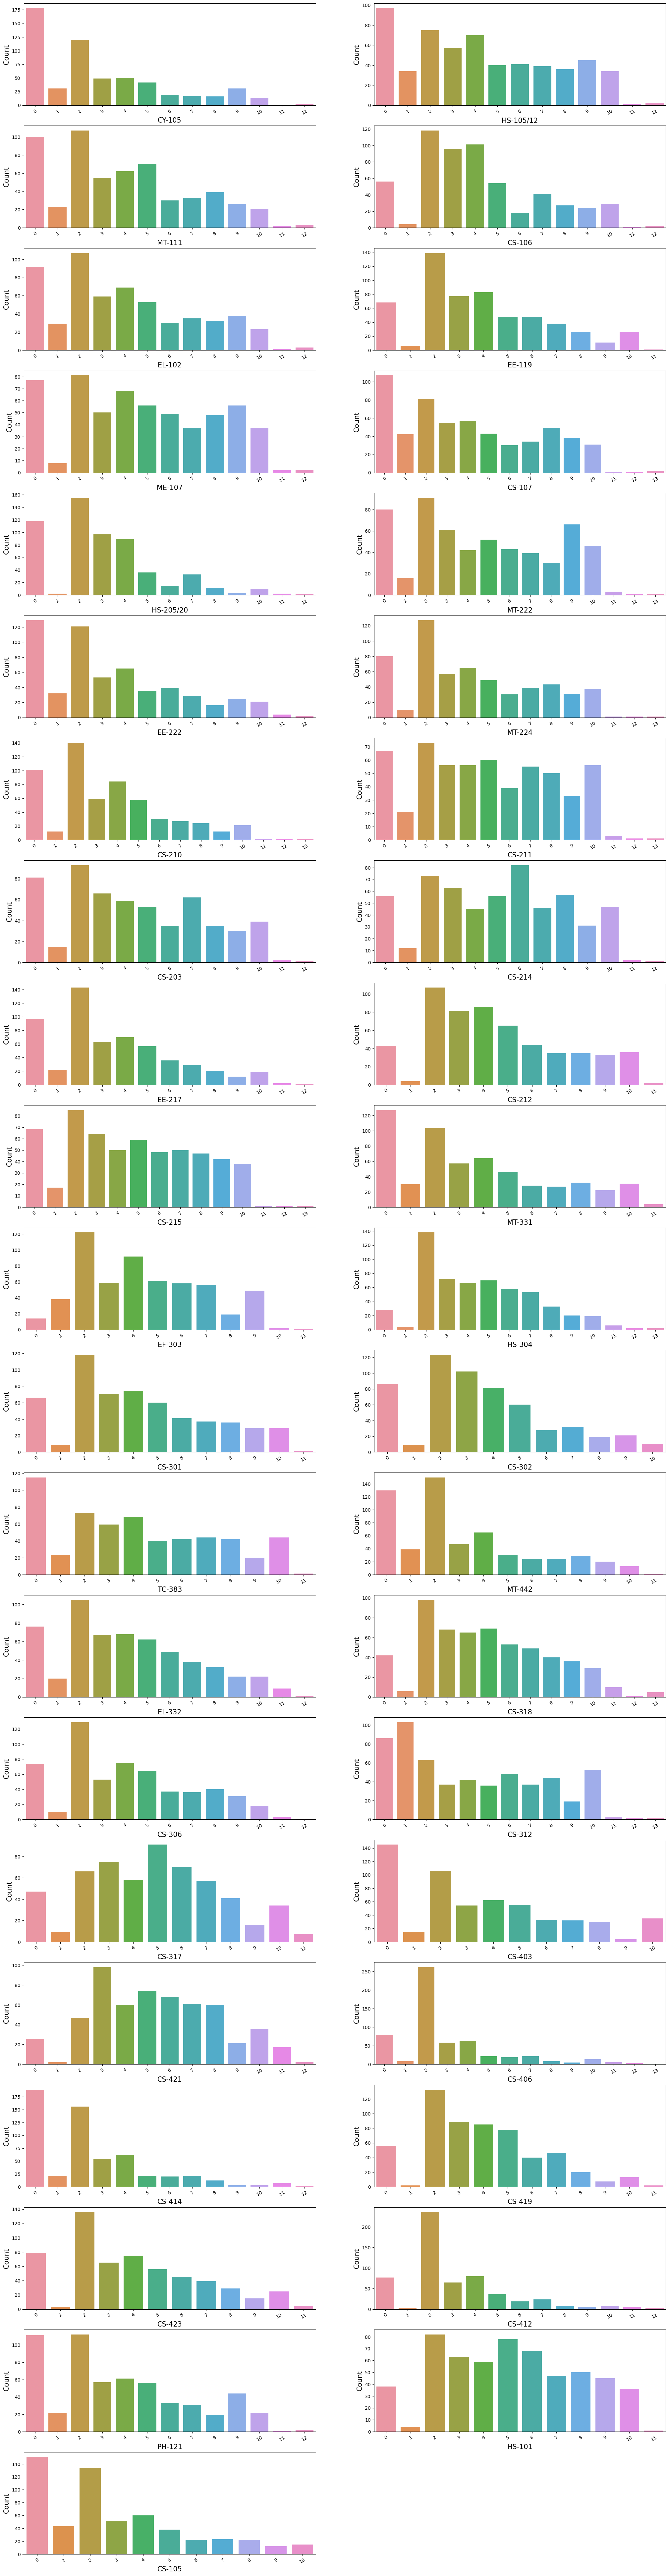

In [34]:
plt.figure(figsize=(25,100))
plotnum = 1

for i in dfnew.columns[0:41]:
    if plotnum <=41:
        plt.subplot(21,2,plotnum)
        sns.countplot(data=dfnew,x=i)
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=10)
        plt.xticks(rotation= 30)
        plt.yticks(fontsize=10)
        plt.ylabel('Count',fontsize=15)
    
    plotnum +=1
plt.show()
    
    

#checking for skewness

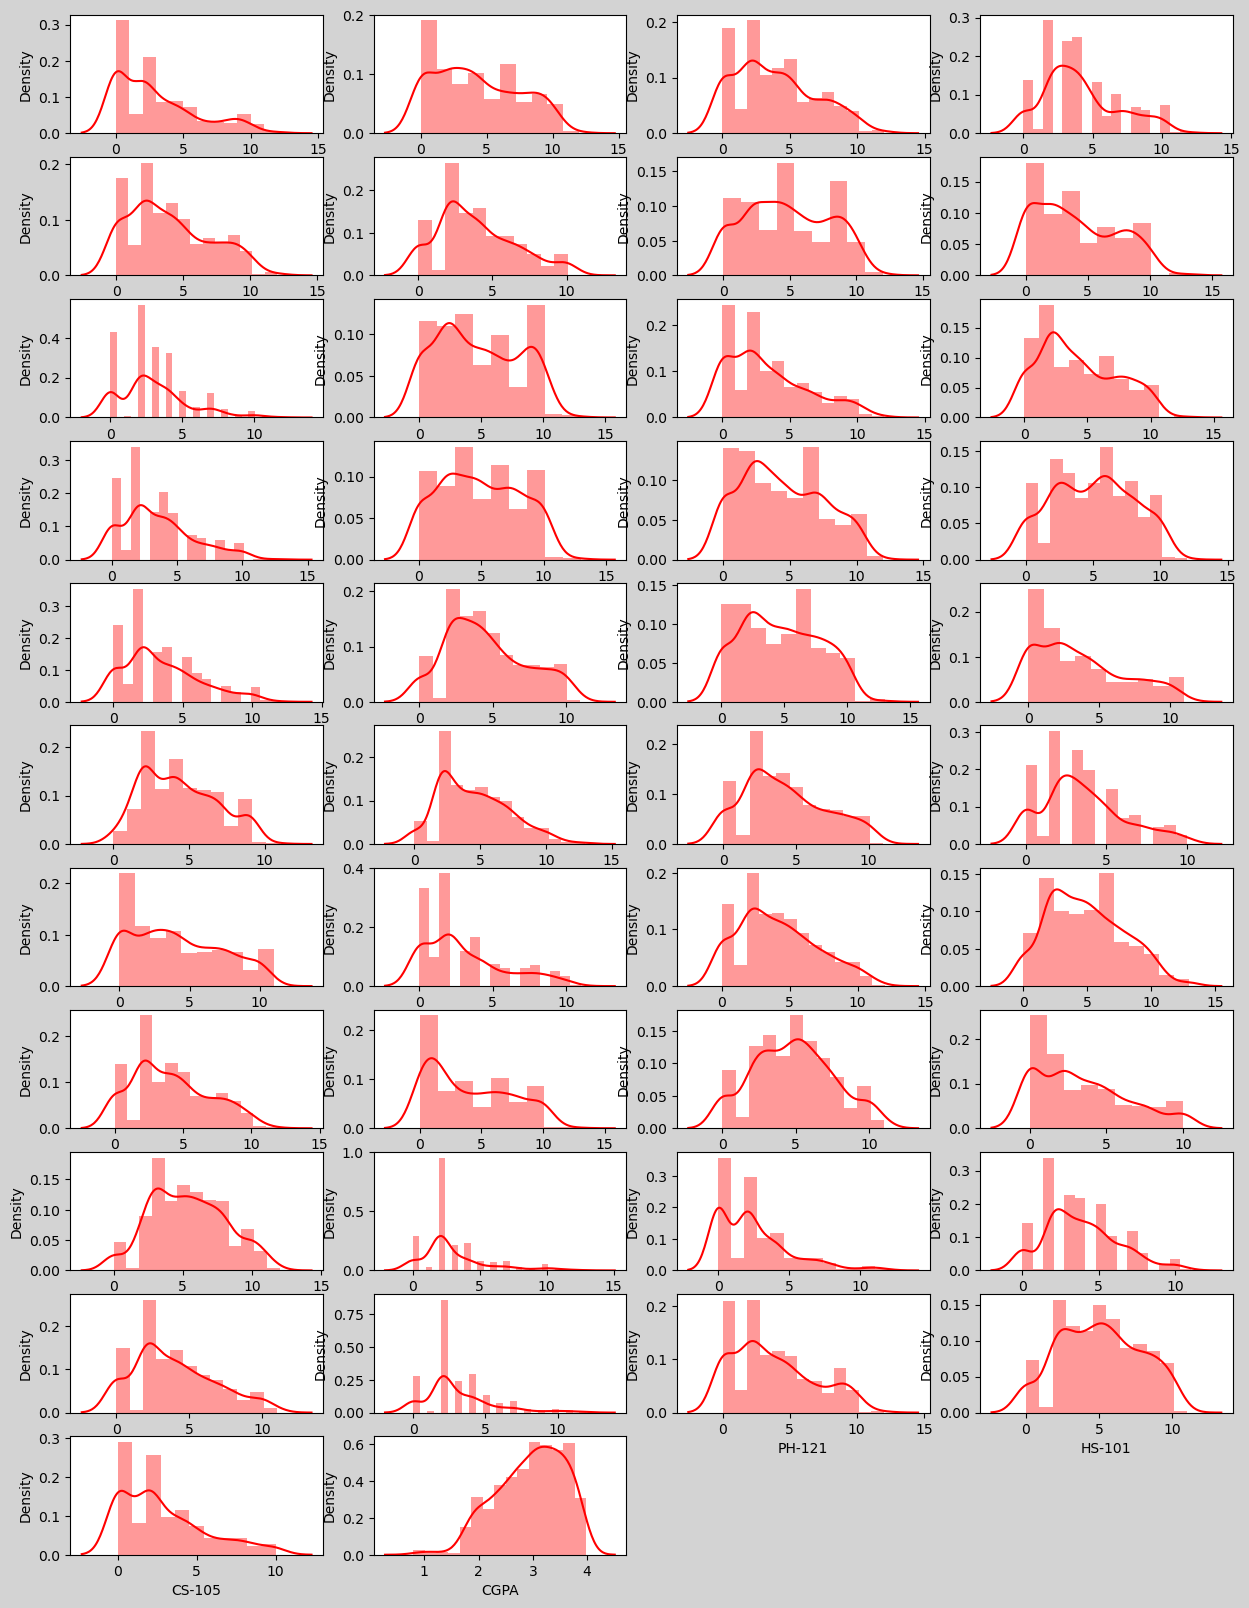

In [41]:
plt.figure(figsize=(15,20),facecolor='lightgrey')
x = 1

for columns in dfnew:
    if x <= 43:
        ax= plt.subplot(11,4,x)
        sns.distplot(dfnew[columns],color="red")
        plt.xlabel(columns)
        x+=1
plt.show()

In [42]:
dfnew.skew()

CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
PH-121       0.549104
HS-101       0.053303
CS-105       0.930769
CGPA        -0.497203
dtype: float64

In [44]:
sns.pairplot(data=dfnew)

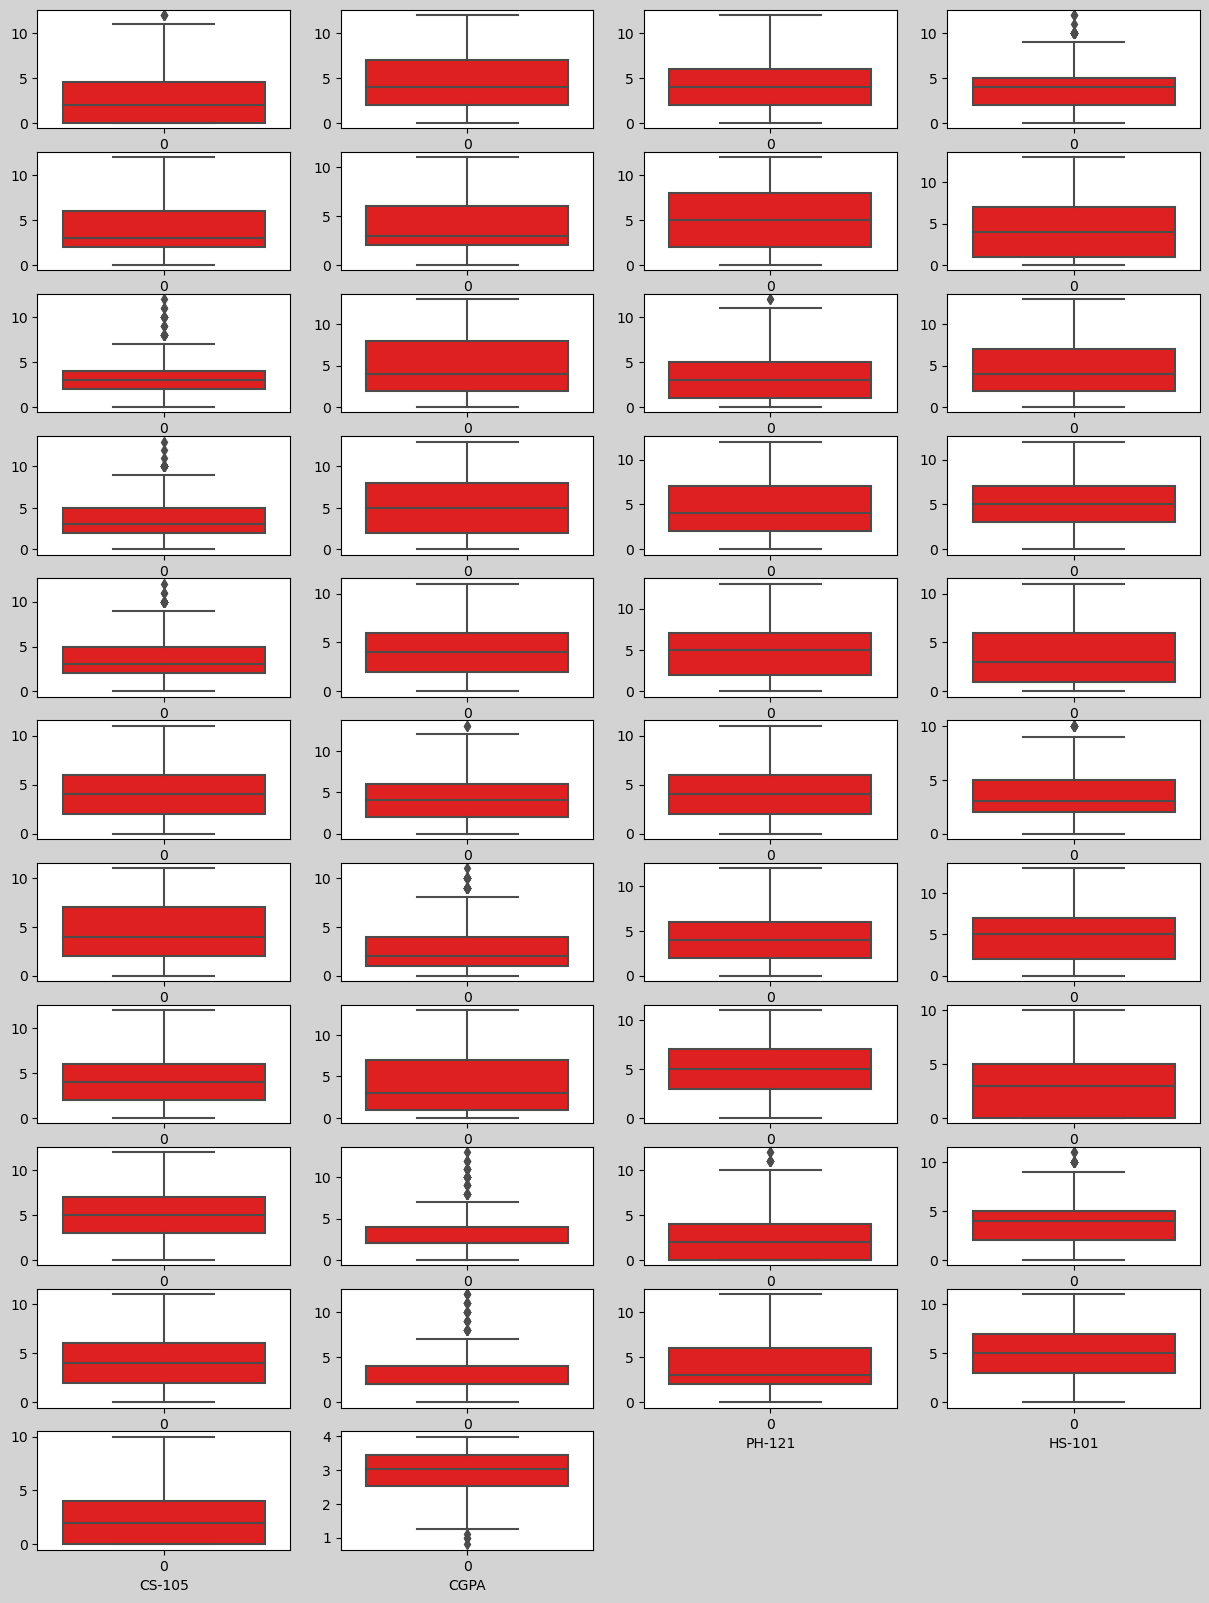

In [45]:
plt.figure(figsize=(15,20),facecolor='lightgrey')
x = 1

for columns in dfnew:
    if x <= 43:
        ax= plt.subplot(11,4,x)
        sns.boxplot(dfnew[columns],color="red")
        plt.xlabel(columns)
        x+=1
plt.show()

# Correlation

In [46]:
dfnew.corr()

CY-105  HS-105/12    MT-111    CS-106    EL-102    EE-119  \
CY-105     1.000000   0.510123  0.538380  0.378223  0.447539  0.467250   
HS-105/12  0.510123   1.000000  0.494731  0.499093  0.360304  0.400303   
MT-111     0.538380   0.494731  1.000000  0.500729  0.555895  0.409161   
CS-106     0.378223   0.499093  0.500729  1.000000  0.338645  0.269895   
EL-102     0.447539   0.360304  0.555895  0.338645  1.000000  0.448908   
EE-119     0.467250   0.400303  0.409161  0.269895  0.448908  1.000000   
ME-107     0.464418   0.320137  0.471685  0.281233  0.461690  0.572964   
CS-107     0.481277   0.540405  0.488977  0.422237  0.454290  0.390834   
HS-205/20  0.261281   0.179766  0.328574  0.115335  0.368922  0.339430   
MT-222     0.485371   0.459571  0.499415  0.362293  0.451722  0.455881   
EE-222     0.394398   0.379369  0.393494  0.185709  0.402440  0.444792   
MT-224     0.437339   0.392068  0.567848  0.383993  0.482855  0.418834   
CS-210     0.489937   0.462070  0.571972  0.410678  0.476998  0.492919   
CS-211     0.453911   0.352640  0.556099  0.358101  0.491606  0.448275   
CS-203     0.400036   0.295711  0.512505  0.284932  0.469012  0.462981   
CS-214     0.463044   0.413251  0.587102  0.431639  0.514220  0.450265   
EE-217     0.398219   0.357855  0.514243  0.322608  0.524913  0.373293   
CS-212     0.420848   0.455820  0.565169  0.521584  0.423416  0.386493   
CS-215     0.512438   0.453450  0.577513  0.368240  0.471845  0.535725   
MT-331     0.366648   0.259306  0.431197  0.271685  0.332554  0.339311   
EF-303     0.334633   0.384338  0.410918  0.434706  0.238987  0.246592   
HS-304     0.323331   0.345015  0.315129  0.136400  0.355373  0.463639   
CS-301     0.368489   0.415815  0.538492  0.482070  0.407084  0.371488   
CS-302     0.460447   0.419373  0.507059  0.361257  0.385230  0.449561   
TC-383     0.300547   0.397499  0.493420  0.496586  0.352761  0.236318   
MT-442     0.430456   0.320701  0.404591  0.246647  0.348731  0.451023   
EL-332     0.353731   0.354519  0.567875  0.356132  0.492130  0.454683   
CS-318     0.322503   0.373775  0.370270  0.236944  0.339214  0.372546   
CS-306     0.362537   0.484828  0.474400  0.338987  0.411977  0.419649   
CS-312     0.261555   0.263143  0.467946  0.450752  0.301324  0.156809   
CS-317     0.472137   0.478816  0.555098  0.416562  0.466556  0.445496   
CS-403     0.464575   0.451907  0.410540  0.426402  0.304240  0.341988   
CS-421     0.349827   0.415946  0.511463  0.397195  0.368959  0.359230   
CS-406     0.129957   0.168150  0.300391  0.129554  0.253133  0.297664   
CS-414     0.008774   0.142806  0.228637  0.108916  0.242234  0.214165   
CS-419     0.430053   0.465352  0.502473  0.421989  0.379308  0.465913   
CS-423     0.120885   0.235029  0.400679  0.339963  0.369173  0.244615   
CS-412     0.064912   0.153293  0.269792  0.185782  0.265289  0.320746   
PH-121     0.557843   0.498561  0.468968  0.293963  0.423942  0.579964   
HS-101     0.335074   0.473132  0.432742  0.312019  0.349412  0.309697   
CS-105     0.578573   0.482406  0.393684  0.286324  0.353949  0.507357   
CGPA      -0.658282  -0.613989 -0.730095 -0.534995 -0.642262 -0.646829   

             ME-107    CS-107  HS-205/20    MT-222  ...    CS-421    CS-406  \
CY-105     0.464418  0.481277   0.261281  0.485371  ...  0.349827  0.129957   
HS-105/12  0.320137  0.540405   0.179766  0.459571  ...  0.415946  0.168150   
MT-111     0.471685  0.488977   0.328574  0.499415  ...  0.511463  0.300391   
CS-106     0.281233  0.422237   0.115335  0.362293  ...  0.397195  0.129554   
EL-102     0.461690  0.454290   0.368922  0.451722  ...  0.368959  0.253133   
EE-119     0.572964  0.390834   0.339430  0.455881  ...  0.359230  0.297664   
ME-107     1.000000  0.341957   0.382366  0.478592  ...  0.345832  0.300913   
CS-107     0.341957  1.000000   0.141581  0.447459  ...  0.354277  0.320558   
HS-205/20  0.382366  0.141581   1.000000  0.305498  ...  0.216016  0.296059   
MT-222     0.478592  0.447459   0.305498

<Axes: >

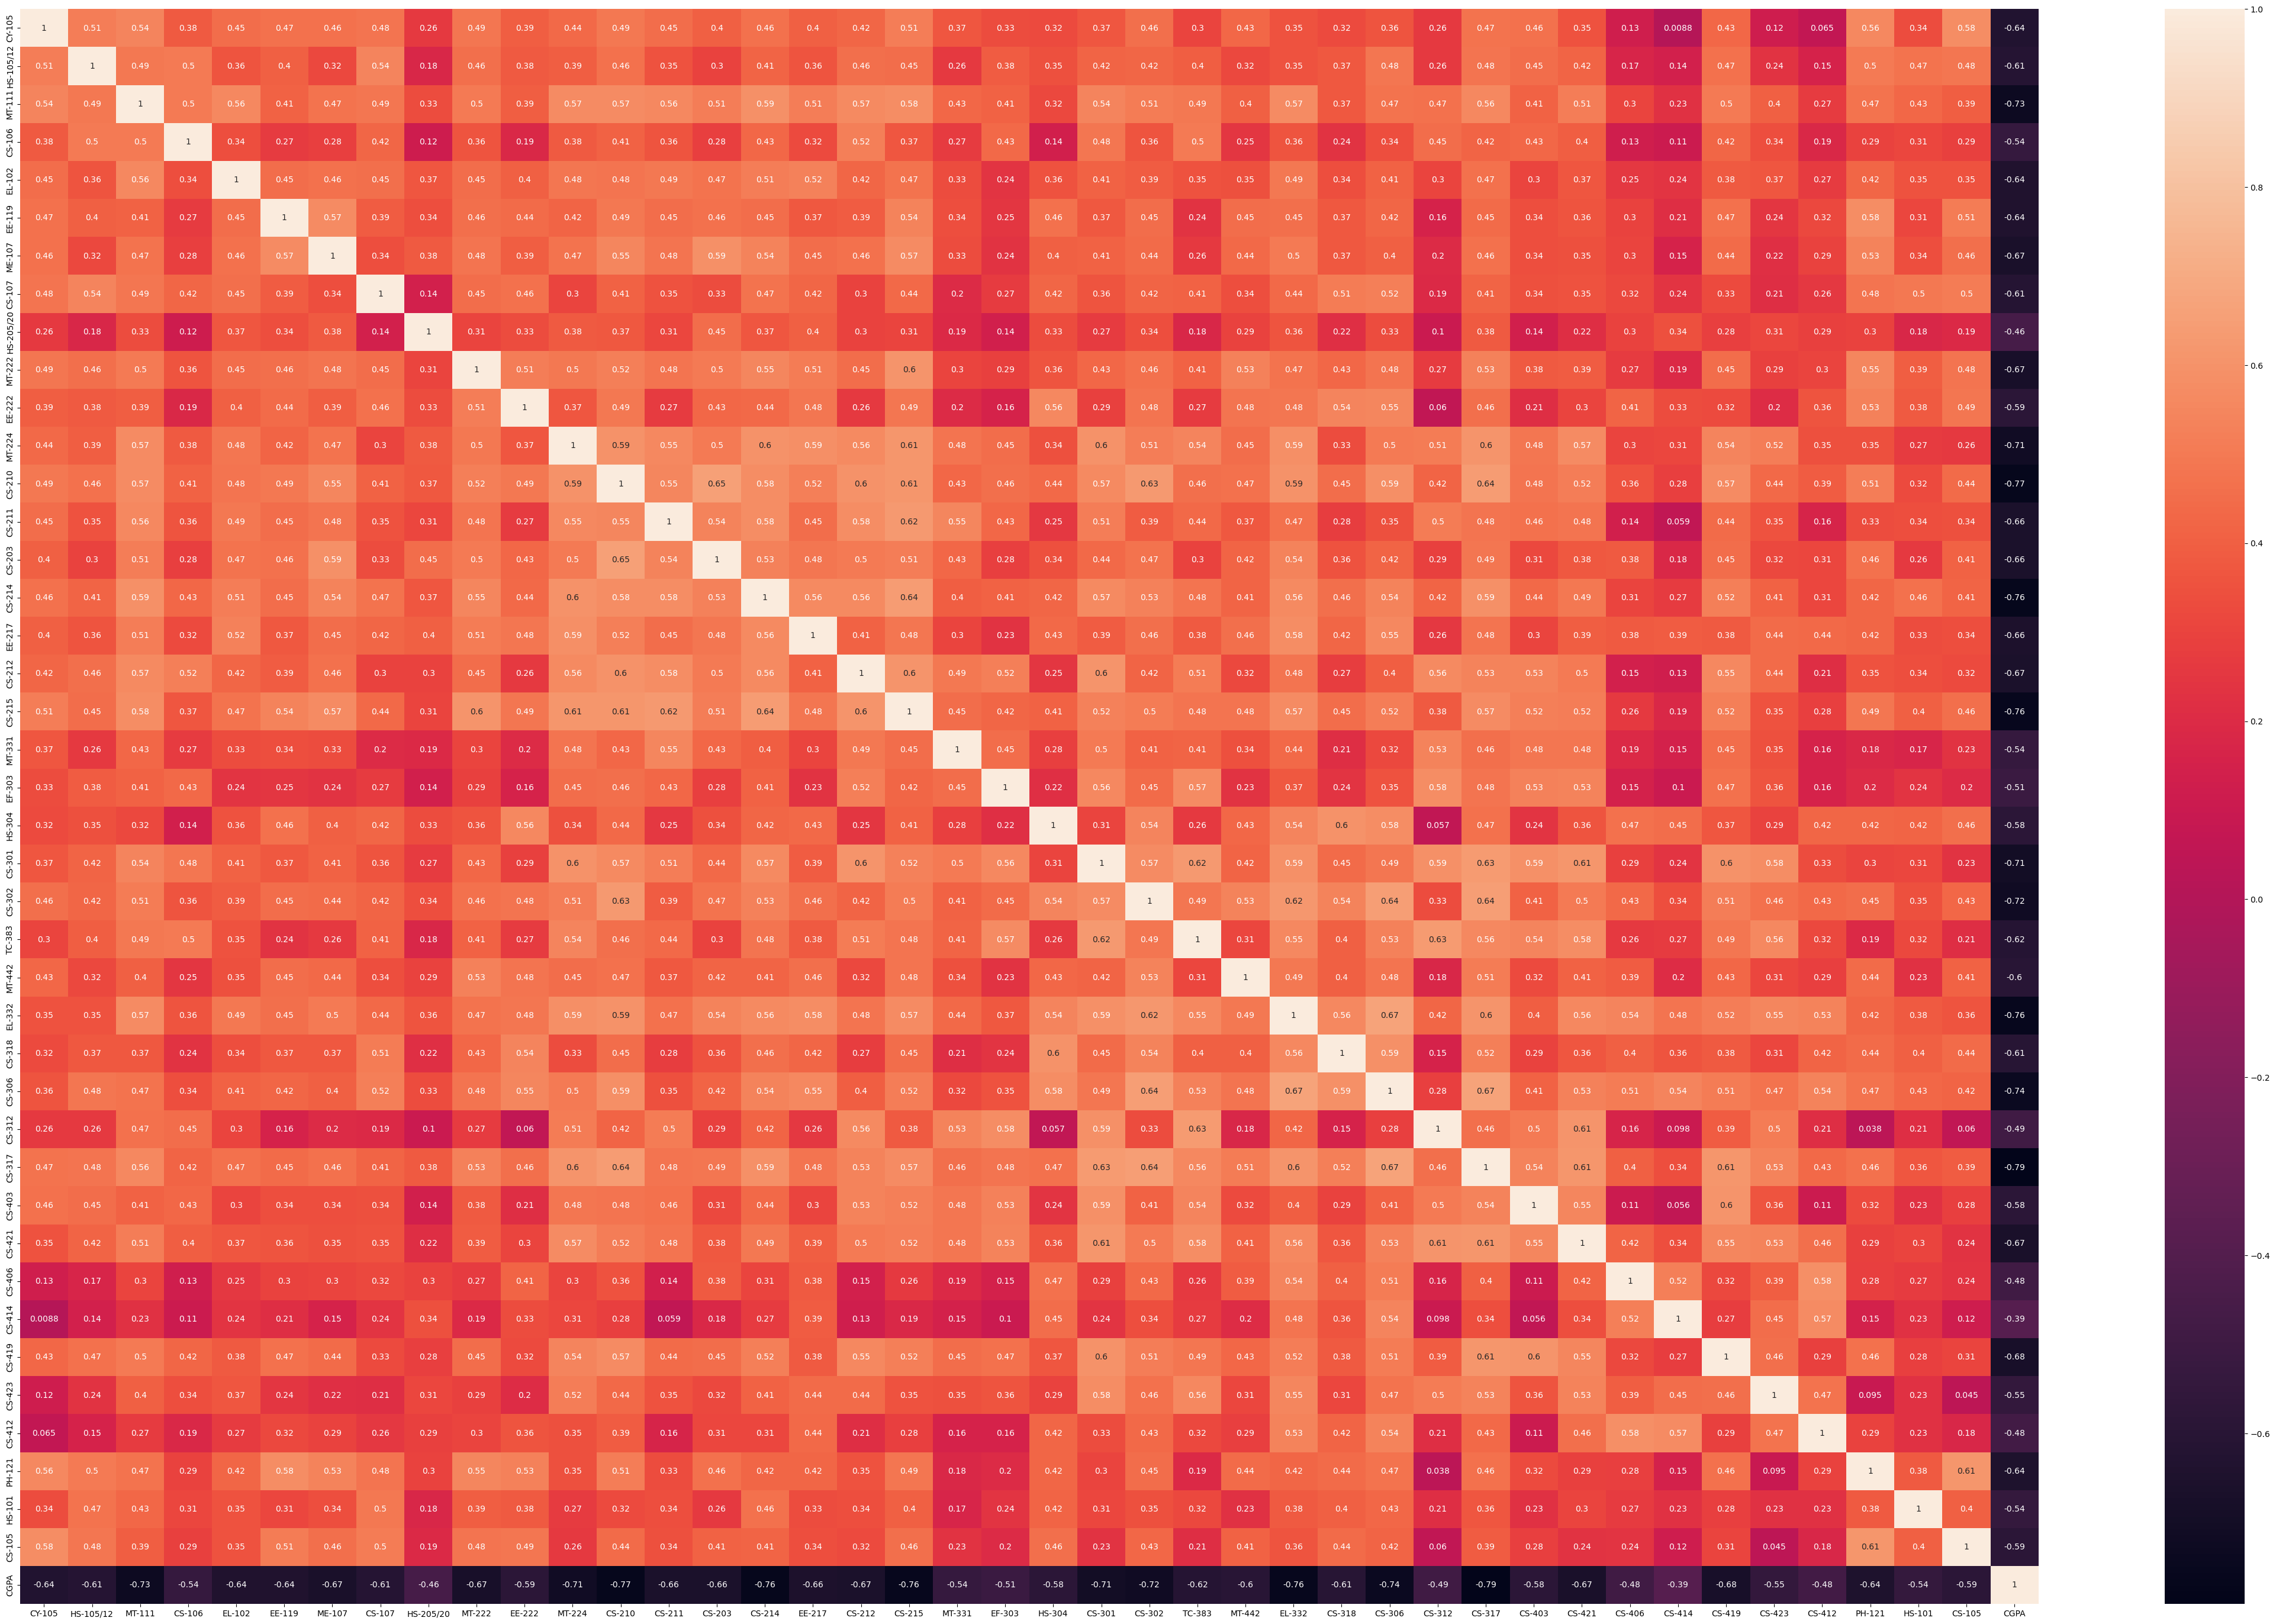

In [12]:
plt.figure(figsize=(55,35))
sns.heatmap(dfnew.corr(),annot=True)

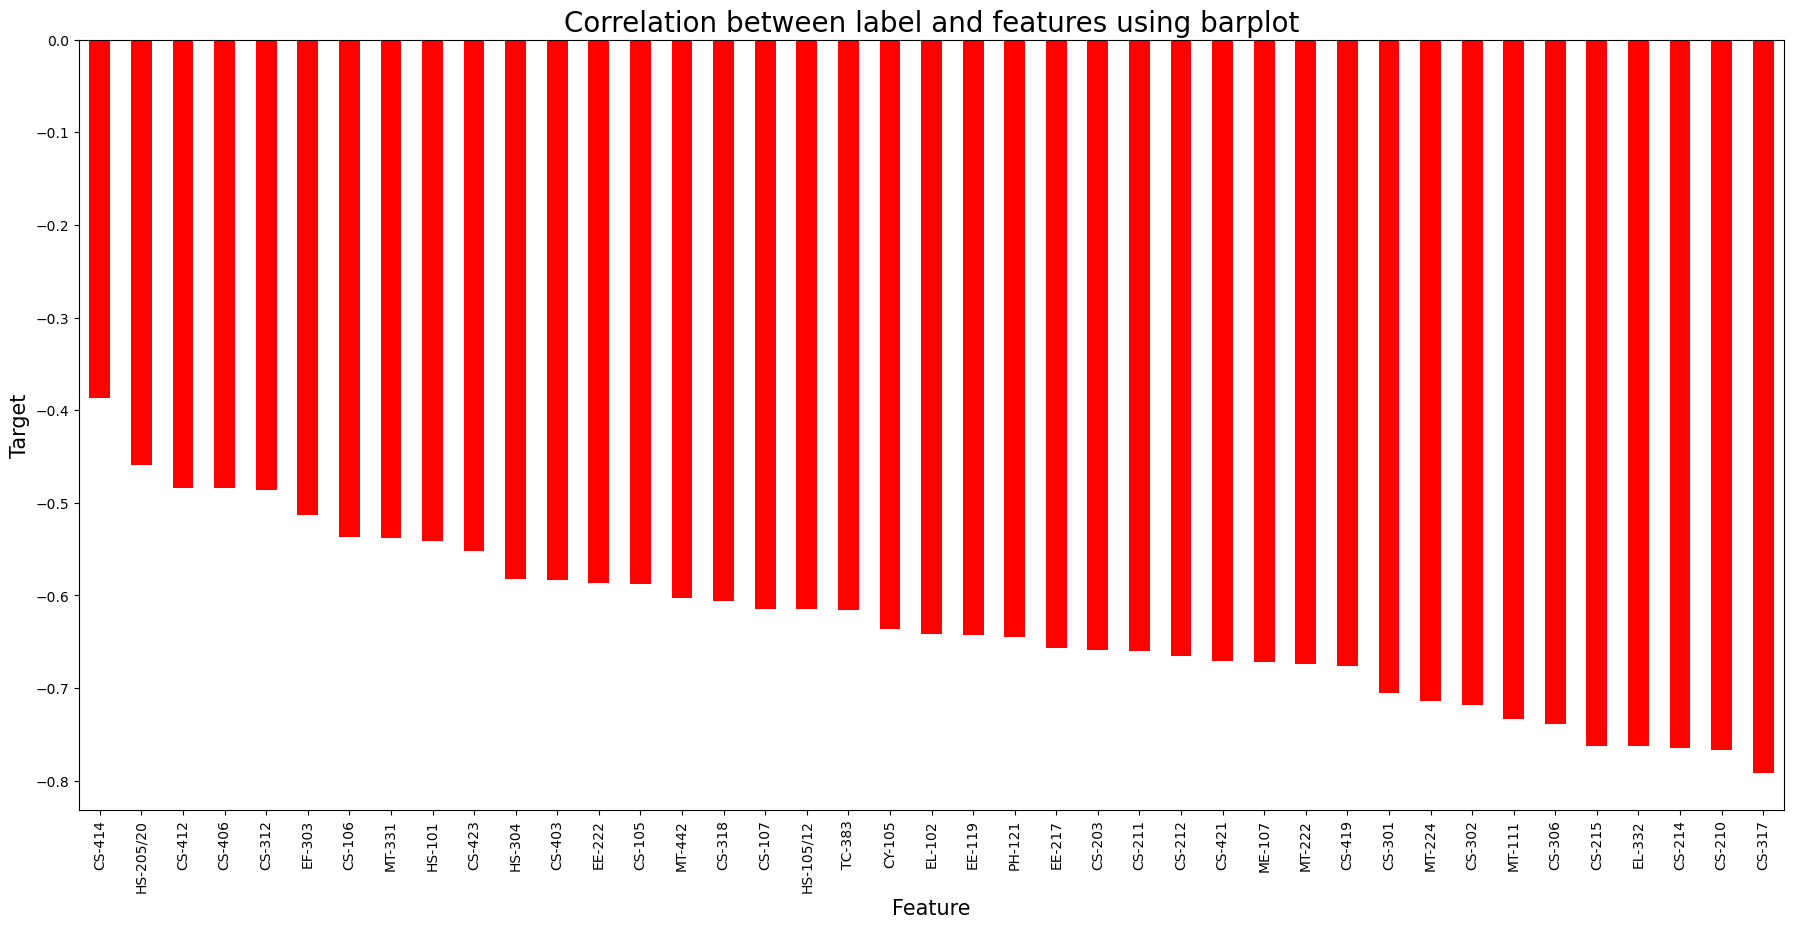

In [15]:
plt.figure(figsize = (22,10))
dfnew.corr()['CGPA'].sort_values(ascending = False).drop(['CGPA']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

# Model Building

In [19]:
#spliting the data
x=dfnew.drop(['CGPA'],axis=1)
y=df['CGPA']

In [20]:
x.shape,y.shape

((571, 41), (571,))

In [26]:
#importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection import cross_val_score


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)

In [28]:
model= [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR(),GradientBoostingRegressor(),AdaBoostRegressor()]

# Finding Best Random State

In [33]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state=i)
    for m in model:
        maxScore = 0
        maxRs = 0
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        score = r2_score(y_test,pred)
        if score>maxScore:
            maxScore = score
            maxRs=i
print("Best Accuracy is:", maxScore, "on Random State:", maxRs)  
    
    

Best Accuracy is: 0.8898803713691104 on Random State: 49


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [51]:
x_train.shape,y_train.shape

((456, 41), (456,))

In [52]:
x_test.shape,y_test.shape

((115, 41), (115,))

# Different model

In [54]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation metrics of',m,':')
    print(f" R2 score is: {r2_score(y_test,pred)*100}")
    print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
    print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))
    print('_________________________________________________________________________________')

Evaluation metrics of LinearRegression() :
 R2 score is: 95.09585722619079

 mean_absolute_error: 
 0.10298390081814664

 mean_squared_error: 
 0.01653009233072399
_________________________________________________________________________________
Evaluation metrics of RandomForestRegressor() :
 R2 score is: 92.91382332885512

 mean_absolute_error: 
 0.10962217391304321

 mean_squared_error: 
 0.023884939743478235
_________________________________________________________________________________
Evaluation metrics of KNeighborsRegressor() :
 R2 score is: 96.6610395632423

 mean_absolute_error: 
 0.08620521739130434

 mean_squared_error: 
 0.011254428521739135
_________________________________________________________________________________
Evaluation metrics of DecisionTreeRegressor() :
 R2 score is: 88.70635591367297

 mean_absolute_error: 
 0.15013043478260865

 mean_squared_error: 
 0.03806679130434781
_________________________________________________________________________________
Ev

Here SVR is giving best r2 score that is 97.12

# Cross validation score

In [55]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Standard deviation :",score.std())
    print('***************************************************************************************************************************')



Cross Validation Score LinearRegression() :
Score : [0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
Mean Score : 0.9034513625626615
Standard deviation : 0.032988221205351616
***************************************************************************************************************************


Cross Validation Score RandomForestRegressor() :
Score : [0.90439076 0.92086383 0.93751673 0.91612406 0.8489479 ]
Mean Score : 0.9055686535030025
Standard deviation : 0.030243464905731352
***************************************************************************************************************************


Cross Validation Score KNeighborsRegressor() :
Score : [0.88704165 0.93105804 0.86498494 0.95195617 0.81245731]
Mean Score : 0.8894996210901137
Standard deviation : 0.04933650082496519
***************************************************************************************************************************


Cross Validation Score DecisionTreeRegressor() :
Score : [0.7799

# HyperParameter  Tuning

In [57]:
params_svr = {'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto']}

Gridsvr = GridSearchCV(SVR(),params_svr)

Gridsvr.fit(x_train,y_train)

print(Gridsvr.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [63]:
#final model building
finalmodel = SVR(gamma='scale',kernel = 'linear')
finalmodel.fit(x_train,y_train)
pred = finalmodel.predict(x_test)
print('R2 score: ',(r2_score(y_test,pred)*100))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  97.97826166662492
Mean Absolute Error:  0.06594971251527455
Mean Squared Error:  0.006814549017155944
Root Mean Squared Error:  0.08255028175091798


Ploting predicted vs actual CGPA

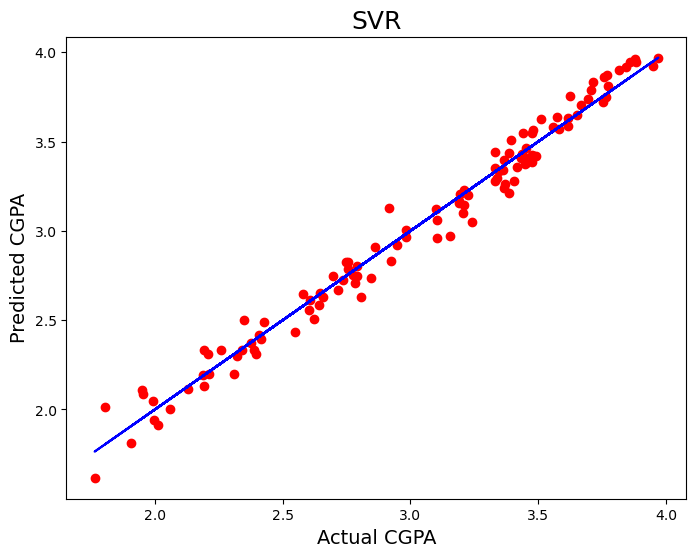

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual CGPA',fontsize = 14)
plt.ylabel('Predicted CGPA',fontsize =14)
plt.title('SVR',fontsize = 18)
plt.show()

# Saving the model

In [61]:
import joblib

In [64]:
joblib.dump(finalmodel,'Student grades prediction.obj')

['Student grades prediction.obj']

# Final prediction

In [66]:
prediction = finalmodel.predict(x_test)
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0          3.433107          3.437
1          3.722249          3.754
2          3.870883          3.769
3          2.192164          2.188
4          2.372046          2.378